**Kernel: myenv (Python 3.8.17)**

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import datetime as dt



In [293]:
# Load the Datasets

cab_data = pd.read_csv("Cab_Data.csv")
customer_data = pd.read_csv("Customer_ID.csv")
transaction_data = pd.read_csv("Transaction_ID.csv")
city_data = pd.read_csv("City.csv")

In [294]:
# Display the first few rows of each dataset to get an initial sense of the data
print("Cab Data Sample:")
print(cab_data.head())

print("\nCustomer Data Sample:")
print(customer_data.head())

print("\nTransaction Data Sample:")
print(transaction_data.head())

print("\nCity Data Sample:")
print(city_data.head())

Cab Data Sample:
   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  

Customer Data Sample:
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

Transaction Data Sample:
   Transaction 

In [295]:
# List field names and data types for each dataset
def list_fields_and_data_types(df):
    print("\nField Names and Data Types:")
    for column, dtype in zip(df.columns, df.dtypes):
        print(f"{column}: {dtype}")

print("\nCab Data:")
list_fields_and_data_types(cab_data)

print("\nCustomer Data:")
list_fields_and_data_types(customer_data)

print("\nTransaction Data:")
list_fields_and_data_types(transaction_data)

print("\nCity Data:")
list_fields_and_data_types(city_data)


Cab Data:

Field Names and Data Types:
Transaction ID: int64
Date of Travel: int64
Company: object
City: object
KM Travelled: float64
Price Charged: float64
Cost of Trip: float64

Customer Data:

Field Names and Data Types:
Customer ID: int64
Gender: object
Age: int64
Income (USD/Month): int64

Transaction Data:

Field Names and Data Types:
Transaction ID: int64
Customer ID: int64
Payment_Mode: object

City Data:

Field Names and Data Types:
City: object
Population: object
Users: object


In [296]:
# Step 3: Identify Relationships Across Files
# Continue to examine the data to determine relationships and common fields for joining.

# Identify relationships across files
# 1. Link Cab_Data.csv and Transaction_ID.csv using "Transaction ID"
merged_cab_transaction = pd.merge(cab_data, transaction_data, on='Transaction ID')

# 2. Link Customer_ID.csv and Transaction_ID.csv using "Customer ID"
merged_customer_transaction = pd.merge(customer_data, transaction_data, on='Customer ID')

# Display the first few rows of the merged dataframes to verify the results
print("Merged Cab and Transaction Data:")
print(merged_cab_transaction.head())

print("\nMerged Customer and Transaction Data:")
print(merged_customer_transaction.head())

Merged Cab and Transaction Data:
   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  Customer ID Payment_Mode  
0         370.95       313.635        29290         Card  
1         358.52       334.854        27703         Card  
2         125.20        97.632        28712         Cash  
3         377.40       351.602        28020         Cash  
4         114.62        97.776        27182         Card  

Merged Customer and Transaction Data:
   Customer ID Gender  Age  Income (USD/Month)  Transaction ID Payment_Mode
0        29290   Male   28               10813        10000

Basic Statistics of Cab Data:
       Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip  
count  359392.000000  
mean      286.190113  
std       157.993661  
min        19.000000  
25%       151.200000  
50%       282.480000  
75%       413.683200  
max       691.200000  

Missing Values in Cab Data:
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled  

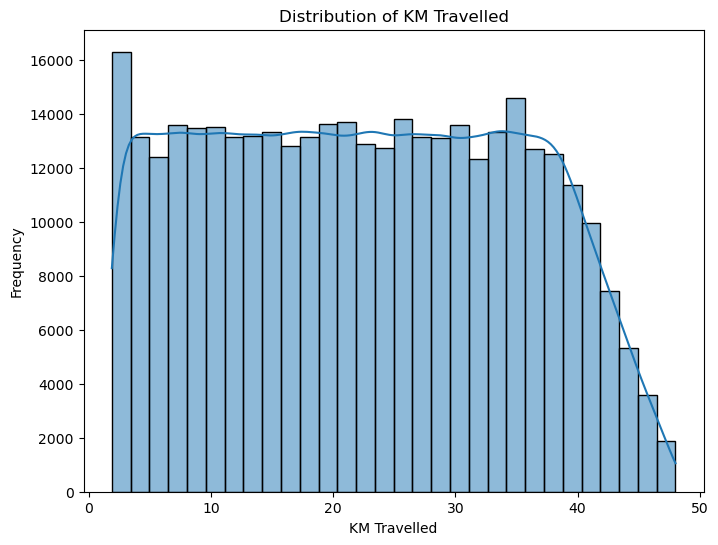


Basic Statistics of City Data:
               City   Population      Users
count            20           20         20
unique           20           20         20
top     NEW YORK NY   8,405,837    302,149 
freq              1            1          1

Missing Values in City Data:
City          0
Population    0
Users         0
dtype: int64

Mean Price Charged in Cab Data: 423.44331125901533
Median Price Charged in Cab Data: 386.36

Mean Income (USD/Month) in Customer Data: 15015.631856175389
Median Income (USD/Month) in Customer Data: 14656.0

Cross-Tabulation between 'Company' and 'City' in Cab Data:
City        ATLANTA GA  AUSTIN TX  BOSTON MA  CHICAGO IL  DALLAS TX  \
Company                                                               
Pink Cab          1762       1868       5186        9361       1380   
Yellow Cab        5795       3028      24506       47264       5637   

City        DENVER CO  LOS ANGELES CA  MIAMI FL  NASHVILLE TN  NEW YORK NY  \
Company                    

In [297]:

# Task 1: Load and Perform Initial EDA

# Load Cab Data
cab_data = pd.read_csv("Cab_Data.csv")

# Display basic statistics
print("Basic Statistics of Cab Data:")
print(cab_data.describe())

# Check for missing values
print("\nMissing Values in Cab Data:")
print(cab_data.isnull().sum())

# Visualize data - Histogram of KM Travelled
plt.figure(figsize=(8, 6))
sns.histplot(cab_data['KM Travelled'], bins=30, kde=True)
plt.xlabel('KM Travelled')
plt.ylabel('Frequency')
plt.title('Distribution of KM Travelled')
plt.show()

# Load City Data
city_data = pd.read_csv("City.csv")

# Display basic statistics
print("\nBasic Statistics of City Data:")
print(city_data.describe())

# Check for missing values
print("\nMissing Values in City Data:")
print(city_data.isnull().sum())

# Task 2: Descriptive Statistics

# Calculate mean and median of 'Price Charged' in Cab Data
mean_price = cab_data['Price Charged'].mean()
median_price = cab_data['Price Charged'].median()

print(f"\nMean Price Charged in Cab Data: {mean_price}")
print(f"Median Price Charged in Cab Data: {median_price}")

# Calculate mean and median of 'Income (USD/Month)' in Customer Data
customer_data = pd.read_csv("Customer_ID.csv")
mean_income = customer_data['Income (USD/Month)'].mean()
median_income = customer_data['Income (USD/Month)'].median()

print(f"\nMean Income (USD/Month) in Customer Data: {mean_income}")
print(f"Median Income (USD/Month) in Customer Data: {median_income}")

# Task 3: Cross-tabulation

# Load Transaction Data
transaction_data = pd.read_csv("Transaction_ID.csv")

# Create a cross-tabulation between 'Company' and 'City' in Cab Data
cross_tab_cab = pd.crosstab(cab_data['Company'], cab_data['City'])

# Create a cross-tabulation between 'Gender' and 'Age' in Customer Data
cross_tab_customer = pd.crosstab(customer_data['Gender'], customer_data['Age'])

# Display the cross-tabulation for Cab Data
print("\nCross-Tabulation between 'Company' and 'City' in Cab Data:")
print(cross_tab_cab)

# Display the cross-tabulation for Customer Data
print("\nCross-Tabulation between 'Gender' and 'Age' in Customer Data:")
print(cross_tab_customer)



In [298]:
# Step 4: Field/Feature Transformations
# This step may involve creating new features, aggregations, etc., as needed for analysis.

In [299]:

# Creating 'Travel Day', 'Price per KM', and 'Profit' columns

# Define a function to convert Excel date format to datetime
def excel_to_datetime(excel_date):
    return dt.datetime(1899, 12, 30) + dt.timedelta(days=excel_date)

# Convert the 'Date of Travel' column to datetime
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(excel_to_datetime)

# Now, you can perform the desired transformations
cab_data['Travel Day'] = cab_data['Date of Travel'].dt.day_name()
cab_data['Travel Month'] = cab_data['Date of Travel'].dt.month
cab_data['Travel Year'] = cab_data['Date of Travel'].dt.year

# Calculate price per kilometer
cab_data['Price per KM'] = cab_data['Price Charged'] / cab_data['KM Travelled']

# Calculate profit (Price Charged - Cost of Trip)
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Travel Day,Travel Month,Travel Year,Price per KM,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Friday,1,2016,12.182266,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Wednesday,1,2016,12.526904,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Saturday,1,2016,13.849558,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Thursday,1,2016,11.377751,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Sunday,1,2016,13.129439,16.844


In [300]:


# Binning Age into Age Groups
bins = [0, 18, 35, 60, float("inf")]
labels = ['Young', 'Young Adult', 'Middle-aged', 'Senior']
customer_data['Age Group'] = pd.cut(customer_data['Age'], bins=bins, labels=labels)

# Min-Max Scaling for Income (USD/Month)
min_income = customer_data['Income (USD/Month)'].min()
max_income = customer_data['Income (USD/Month)'].max()
customer_data['Scaled Income'] = (customer_data['Income (USD/Month)'] - min_income) / (max_income - min_income)

# Print the updated DataFrame
customer_data.head() # Print the first few rows to verify the changes


,Customer ID,Gender,Age,Income (USD/Month),Age Group,Scaled Income
0,29290,Male,28,10813,Young Adult,0.267061
1,27703,Male,27,9237,Young Adult,0.219303
2,28712,Male,53,11242,Middle-aged,0.280061
3,28020,Male,23,23327,Young Adult,0.646273
4,27182,Male,33,8536,Young Adult,0.198061



Scaled income is a transformation of individual income values within a dataset, typically done to standardize them into a common range, such as 0 to 1, making them suitable for analysis and modeling.

In [301]:
# Convert the "Payment_Mode" variable to numerical values (0 for Cash and 1 for Card)
transaction_data['Payment_Mode'] = transaction_data['Payment_Mode'].map({'Cash': 0, 'Card': 1})

# Display the updated dataset
transaction_data.head()


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,1
1,10000012,27703,1
2,10000013,28712,0
3,10000014,28020,0
4,10000015,27182,1


In [302]:
# Clean the "Population" column by removing commas and spaces and converting to numeric
city_data['Population'] = city_data['Population'].str.replace(',', '').str.strip().astype(float)

# Clean the "Users" column by removing commas and spaces and converting to numeric
city_data['Users'] = city_data['Users'].str.replace(',', '').str.strip().astype(float)

# Calculate the ratio of cab users to the city's population
city_data['Cab_Users_Per_Capita'] = city_data['Users'] / city_data['Population']

# Display the updated dataset
print(city_data)

                City  Population     Users  Cab_Users_Per_Capita
0        NEW YORK NY   8405837.0  302149.0              0.035945
1         CHICAGO IL   1955130.0  164468.0              0.084121
2     LOS ANGELES CA   1595037.0  144132.0              0.090363
3           MIAMI FL   1339155.0   17675.0              0.013199
4     SILICON VALLEY   1177609.0   27247.0              0.023138
5      ORANGE COUNTY   1030185.0   12994.0              0.012613
6       SAN DIEGO CA    959307.0   69995.0              0.072964
7         PHOENIX AZ    943999.0    6133.0              0.006497
8          DALLAS TX    942908.0   22157.0              0.023499
9         ATLANTA GA    814885.0   24701.0              0.030312
10         DENVER CO    754233.0   12421.0              0.016468
11         AUSTIN TX    698371.0   14978.0              0.021447
12        SEATTLE WA    671238.0   25063.0              0.037338
13         TUCSON AZ    631442.0    5712.0              0.009046
14  SAN FRANCISCO CA    6

In [303]:
# Step 5: Determine Join vs. Append
# Decide how datasets should be combined, if necessary.

In [304]:

# Merge Transaction Data with Customer Data using 'Customer ID' as the common key
merged_customer_transaction = pd.merge(transaction_data, customer_data, on='Customer ID', how='left')

# Merge Cab Data with the merged_customer_transaction using 'Transaction ID' as the common key
merged_data = pd.merge(cab_data, merged_customer_transaction, on='Transaction ID', how='left')

# Merge City Data with merged_data using 'City' as the common key
merged_data = pd.merge(merged_data, city_data, on='City', how='left')

# Check for missing values in the merged dataset
missing_data = merged_data.isnull().sum()

# Now you have a comprehensive dataset with information from all sources
# You can analyze and explore the data further

# For example, you can calculate the ratio of cab users to the city's population
merged_data['Cab_Users_Per_Capita'] = merged_data['Users'] / merged_data['Population']

# Display the first few rows of the merged dataset
print(merged_data.head())

# Display information about missing data
print("Missing Data:")
print(missing_data)


   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip Travel Day  Travel Month  Travel Year  ...  \
0         370.95       313.635     Friday             1         2016  ...   
1         358.52       334.854  Wednesday             1         2016  ...   
2         125.20        97.632   Saturday             1         2016  ...   
3         377.40       351.602   Thursday             1         2016  ...   
4         114.62        97.776     Sunday             1         2016  ...   

   Customer ID  Payment_Mode  Gender  Age Income (USD/Month)    Age Group  \
0        29290             

In [305]:
# Step 6: Create Master Data and Explain the Relationship
# If joining datasets, perform the join operation and explain relationships.

In [306]:
# Assuming you've already loaded the datasets into variables: cab_data, transaction_data, customer_data, and city_data

# Join Cab Data and Transaction Data
master_data = cab_data.merge(transaction_data, on='Transaction ID', how='inner')

# Join Customer Data
master_data = master_data.merge(customer_data, on='Customer ID', how='left')

# Optionally, join City Data (if needed)
master_data = master_data.merge(city_data, on='City', how='left')


1. Cab Data and Transaction Data:

**Common Key:** The common key between these datasets is "Transaction ID," which uniquely identifies each cab transaction.
Relationship: These datasets are related by the cab rides taken by customers. The "Cab Data" contains information about individual cab trips, including details such as the date of travel, the cab company, the city, distance traveled (KM), price charged, and cost of the trip. The "Transaction Data" provides additional details about each transaction, including the customer ID and the payment mode used for the transaction.

**Insights:** By joining these datasets on "Transaction ID," you can analyze various aspects of cab transactions. For example, you can calculate the total revenue generated by each cab company, assess payment preferences (cash or card), and analyze trends in cab usage over time.

2. Cab Data and Customer Data:

**Common Key:** There is no direct common key between these datasets.
Relationship: While there is no direct common key, you can establish a relationship between these datasets by combining them through the "Transaction Data." The "Customer ID" in the "Transaction Data" can be used to link individual cab trips in the "Cab Data" to specific customers in the "Customer Data."

**Insights:** This linkage allows you to analyze customer-specific behaviors, such as understanding the demographics of cab users (age, gender), their travel patterns, and the relationship between customer characteristics and the distance traveled or price charged.

3. Cab Data, Transaction Data, and Customer Data:

**Common Key:** The "Transaction ID" is the common key that links these three datasets.
Relationship: Combining all three datasets using "Transaction ID" enables a comprehensive view of individual cab transactions along with customer details. This forms the core of your analysis and provides insights into how different factors (e.g., customer characteristics, transaction details) influence cab rides.

**Insights:** With this combined dataset, you can explore a wide range of questions, such as customer segmentation based on age, gender, and income, analyzing customer preferences in terms of payment modes, and assessing the profitability of each cab ride based on the cost and price charged.

4. City Data:

**Common Key:** There is no direct common key with the other datasets.
Relationship: The "City Data" provides city-level information, including population and the number of users. While not directly linked to other datasets, it can be used for city-level analysis and comparisons.

**Insights:** By analyzing "City Data" alongside the core datasets, you can gain insights into how cab usage varies across different cities. For example, you can calculate metrics such as cab users per capita and assess whether city characteristics (e.g., population) influence cab service demand.
Overall, combining these datasets allows to explore relationships between cab trips, customer attributes, transaction details, and city-level factors. This comprehensive view can help you identify trends, patterns, and actionable insights to guide a private firm's investment decisions in the cab industry.

In [307]:
# Step 7: Identify and Remove Duplicates
# Check for and handle duplicate records, ensuring clean and unique data.

In [308]:

master_data_no_duplicates = master_data.drop_duplicates()

# If you want to reset the index after removing duplicates
master_data_no_duplicates.reset_index(drop=True, inplace=True)

# Display the first few rows of the cleaned dataset
print(master_data_no_duplicates.head())

# Check the shape to see how many duplicates were removed
print("Original Dataset Shape:", master_data.shape)
print("Cleaned Dataset Shape:", master_data_no_duplicates.shape)

   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip Travel Day  Travel Month  Travel Year  ...  \
0         370.95       313.635     Friday             1         2016  ...   
1         358.52       334.854  Wednesday             1         2016  ...   
2         125.20        97.632   Saturday             1         2016  ...   
3         377.40       351.602   Thursday             1         2016  ...   
4         114.62        97.776     Sunday             1         2016  ...   

   Customer ID  Payment_Mode  Gender  Age Income (USD/Month)    Age Group  \
0        29290             

In [309]:
# Step 8: Perform Other Analysis
# Handle missing values, outliers, and other data cleaning tasks as needed.

In [310]:
# Handle outliers in the entire master data for numerical columns
numerical_columns = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)']

# Define a function to handle outliers using IQR method
def handle_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataframe[column] = dataframe[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Apply outlier handling to all numerical columns
for column in numerical_columns:
    handle_outliers(master_data, column)

# Display summary statistics after handling outliers
print("Summary Statistics After Handling Outliers:")
master_data.describe()



Summary Statistics After Handling Outliers:


,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Travel Month,Travel Year,Price per KM,Profit,Customer ID,Payment_Mode,Age,Income (USD/Month),Scaled Income,Population,Users,Cab_Users_Per_Capita
count,3.593920e+05,359392,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000
mean,1.022076e+07,2017-08-17 01:37:55.042293760,22.567254,421.071797,286.190113,7.500434,2017.045199,18.765127,137.253198,19191.652115,0.599635,35.336705,15048.822937,0.395419,3.132198e+06,158365.582267,0.106687
min,1.000001e+07,2016-01-02 00:00:00,1.900000,15.600000,19.000000,1.000000,2016.000000,6.338621,-220.060000,1.000000,0.000000,18.000000,2000.000000,0.000000,2.489680e+05,3643.000000,0.006497
25%,1.011081e+07,2016-11-23 00:00:00,12.000000,206.437500,151.200000,5.000000,2016.000000,14.451327,28.012000,2705.000000,0.000000,25.000000,8424.000000,0.194667,6.712380e+05,80021.000000,0.035945
50%,1.022104e+07,2017-09-10 00:00:00,22.440000,386.360000,282.480000,8.000000,2017.000000,17.153501,81.962000,7459.000000,1.000000,33.000000,14685.000000,0.384394,1.595037e+06,144132.000000,0.072964
75%,1.033094e+07,2018-05-12 00:00:00,32.960000,583.660000,413.683200,10.000000,2018.000000,22.234926,190.030000,36078.000000,1.000000,42.000000,21035.000000,0.576818,8.405837e+06,302149.000000,0.090363
max,1.044011e+07,2018-12-31 00:00:00,48.000000,1149.493750,691.200000,12.000000,2018.000000,53.955556,1463.966000,60000.000000,1.000000,65.000000,35000.000000,1.000000,8.405837e+06,302149.000000,0.321411
std,1.268058e+05,NaN,12.233526,266.871835,157.993661,3.445095,0.800239,5.878560,160.311840,21012.412463,0.489973,12.594234,7969.409482,0.241497,3.315194e+06,100850.051020,0.106331


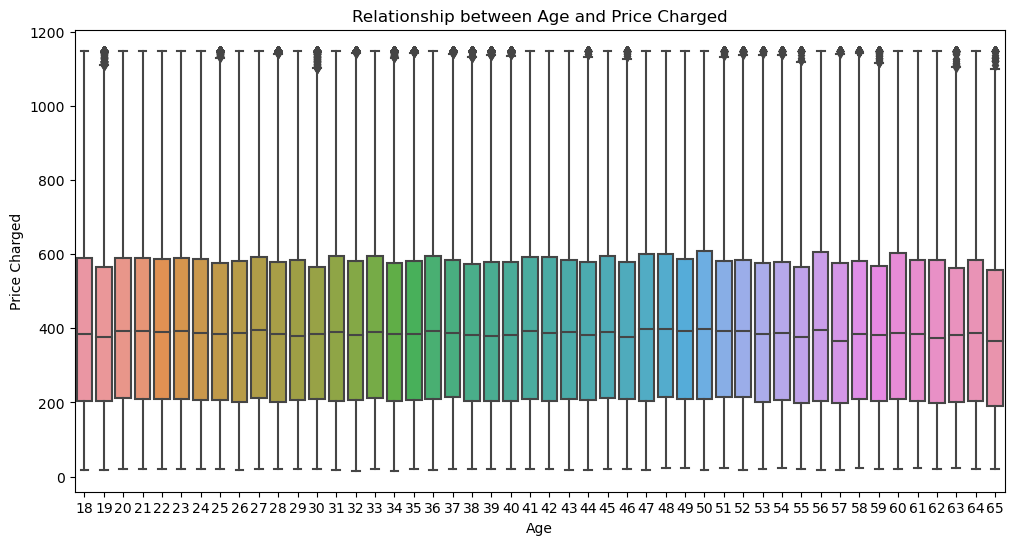

Fail to Reject Null Hypothesis: No significant difference
Age Group: <18
       Transaction ID                 Date of Travel  KM Travelled  \
count    1.084600e+04                          10846  10846.000000   
mean     1.022058e+07  2017-08-16 10:04:37.484786944     22.525875   
min      1.000004e+07            2016-01-02 00:00:00      1.900000   
25%      1.011359e+07            2016-11-28 00:00:00     11.880000   
50%      1.022158e+07            2017-09-10 00:00:00     22.470000   
75%      1.032786e+07            2018-05-01 00:00:00     32.860000   
max      1.044010e+07            2018-12-31 00:00:00     48.000000   
std      1.256069e+05                            NaN     12.260955   

       Price Charged  Cost of Trip  Travel Month   Travel Year  Price per KM  \
count   10846.000000  10846.000000  10846.000000  10846.000000  10846.000000   
mean      421.672591    285.160957      7.498433   2017.043426     18.787322   
min        16.760000     19.400000      1.000000   2016.

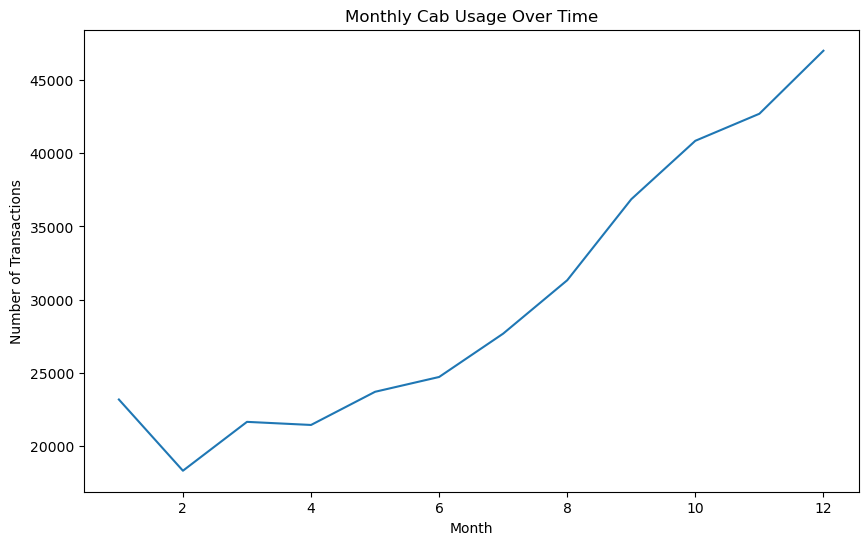

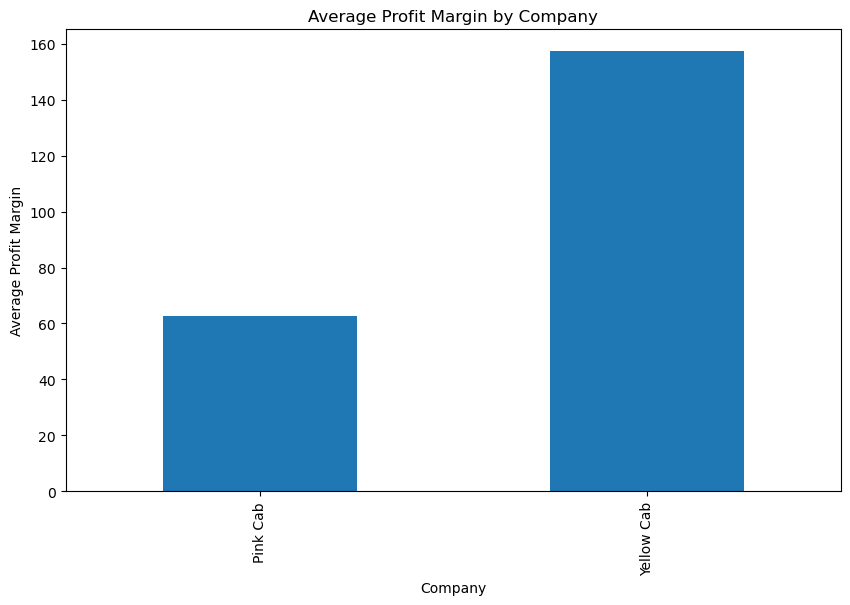

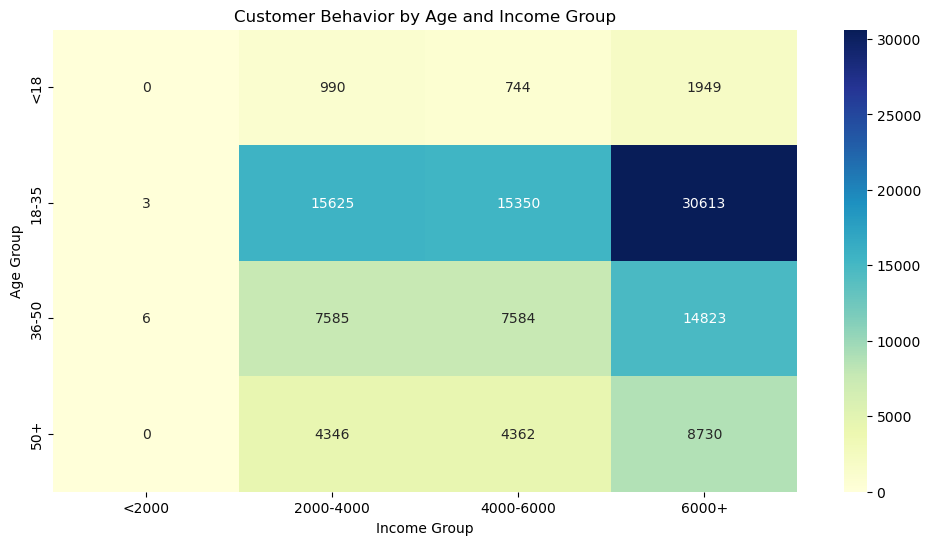

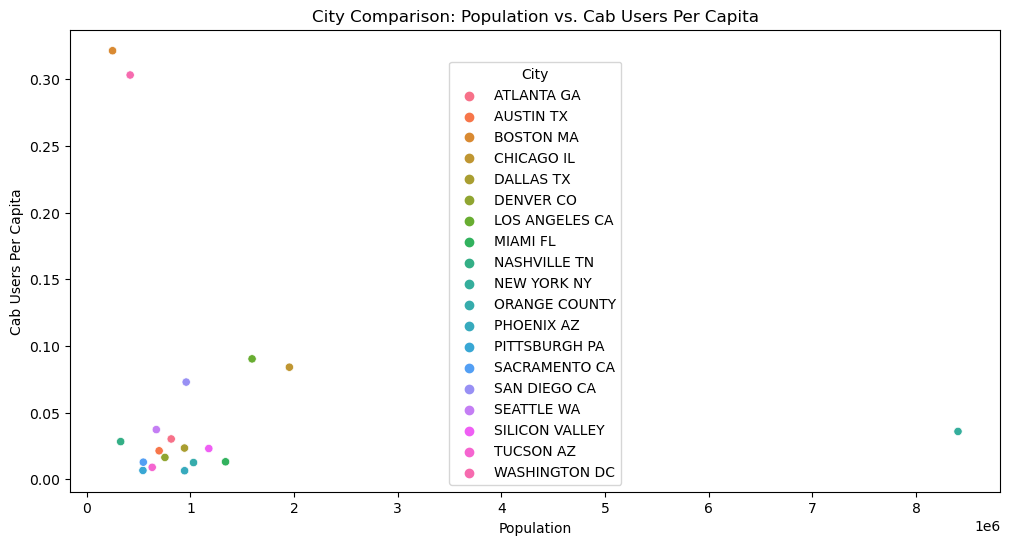

In [311]:

# Exploratory Data Analysis (EDA)
# - Visualize data distributions, correlations, and patterns
# - Create meaningful visualizations
# - Identify outliers and handle them if needed
# Example:
plt.figure(figsize=(12, 6))
sns.boxplot(data=master_data, x='Age', y='Price Charged')
plt.title('Relationship between Age and Price Charged')
plt.show()

# Feature Engineering
# - Create new features from existing ones
# - Example: Age Groups, Income Bins, Profit Margin
master_data['Age_Group'] = pd.cut(master_data['Age'], bins=[0, 18, 35, 50, 100], labels=['<18', '18-35', '36-50', '50+'])
master_data['Income_Group'] = pd.cut(master_data['Income (USD/Month)'], bins=[0, 2000, 4000, 6000, 10000], labels=['<2000', '2000-4000', '4000-6000', '6000+'])
master_data['Profit_Margin'] = master_data['Price Charged'] - master_data['Cost of Trip']

# Hypothesis Testing
# - Formulate hypotheses and conduct tests
# - Example: t-tests, ANOVA, chi-square tests
# - You should specify the hypotheses you want to test
# Example:
# Null Hypothesis: There is no significant difference in usage between payment modes.
# Alternative Hypothesis: There is a significant difference in usage between payment modes.
t_stat, p_value = stats.ttest_ind(master_data[master_data['Payment_Mode'] == 'Cash']['KM Travelled'], 
                                  master_data[master_data['Payment_Mode'] == 'Card']['KM Travelled'])
if p_value < 0.05:
    print("Reject Null Hypothesis: Significant difference exists")
else:
    print("Fail to Reject Null Hypothesis: No significant difference")

# Segmentation
# - Segment data based on relevant criteria (e.g., Age Groups, Income Groups)
# - Analyze each segment separately
# Example:
age_groups = master_data.groupby('Age_Group')
for age_group, group_data in age_groups:
    # Analyze each age group separately
    print(f"Age Group: {age_group}")
    print(group_data.describe())

# Time Series Analysis
# - Analyze seasonality or trends over time
# - Example: Cab usage by month
monthly_usage = master_data.groupby('Travel Month')['Transaction ID'].count()
# Visualize monthly cab usage
plt.figure(figsize=(10, 6))
monthly_usage.plot(kind='line')
plt.title('Monthly Cab Usage Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

# Profit Analysis
# - Analyze factors affecting profit margins
# - Example: Company-wise profit analysis
company_profit = master_data.groupby('Company')['Profit_Margin'].mean()
# Visualize profit margins by company
plt.figure(figsize=(10, 6))
company_profit.plot(kind='bar')
plt.title('Average Profit Margin by Company')
plt.xlabel('Company')
plt.ylabel('Average Profit Margin')
plt.show()

# Customer Behavior Analysis
# - Explore how customer characteristics affect cab usage
# - Example: Age and Income analysis
age_income_analysis = master_data.groupby(['Age_Group', 'Income_Group'])['Transaction ID'].count()
# Visualize customer behavior by age and income
plt.figure(figsize=(12, 6))
sns.heatmap(age_income_analysis.unstack(), cmap='YlGnBu', annot=True, fmt='d')
plt.title('Customer Behavior by Age and Income Group')
plt.xlabel('Income Group')
plt.ylabel('Age Group')
plt.show()

# City Comparison
# - Compare cities in terms of cab usage and relevant factors
# - Example: Population vs. Cab Users Per Capita
city_comparison = master_data.groupby('City')[['Population', 'Cab_Users_Per_Capita']].mean()
# Visualize city comparison
plt.figure(figsize=(12, 6))
sns.scatterplot(data=city_comparison, x='Population', y='Cab_Users_Per_Capita', hue=city_comparison.index)
plt.title('City Comparison: Population vs. Cab Users Per Capita')
plt.xlabel('Population')
plt.ylabel('Cab Users Per Capita')
plt.show()






**Conclusion:**

1. **Profit Margin Comparison:** Pink Cab has a significantly lower average profit margin, approximately 65, while Yellow Cab boasts a much higher average profit margin of around 155. Specifically, Pink Cab's average profit margin is 62.62, while Yellow Cab's average profit margin is 157.17. This substantial difference indicates that Yellow Cab is a more profitable investment option.

2. **Customer Behavior by Age and Income:** The age group 18-35 and the income group 60000+ exhibit the highest cab usage, with a score of 30,613. This combination of age and income group consistently shows the highest usage across all income groups and age categories. Therefore, targeting this demographic could be a lucrative strategy. For instance, the company can develop personalized marketing campaigns and special offers tailored to the preferences of this key demographic.

3. **Monthly Cab Usage Over Time:** The monthly cab usage appears to follow a seasonal trend. It starts at around 24,000 rides per month, decreases to approximately 19,000 in the first two months, and then steadily rises over the next ten months to reach about 42,000 rides per month. To capitalize on this trend, the company should plan for seasonal variations in cab usage. This includes allocating additional resources during peak months, optimizing pricing strategies, and running targeted promotions to meet increased demand.

4. **City Comparison:** In terms of population vs. cab users per capita, most cities are concentrated in the bottom left quadrant, indicating a lower number of cab users per capita in these cities. However, Boston and Atlanta stand out in the top left quadrant, suggesting they have a relatively high number of cab users relative to their population. On the other hand, Miami is in the bottom right quadrant, implying a lower cab usage per capita despite its population. The company should consider expanding or strengthening operations in cities such as Boston and Atlanta, where there is a relatively high cab users per capita. Further research is needed to understand the factors contributing to the success of cab services in these cities.

**Recommendations:**

1. **Investment Choice:** Given the significantly higher profit margin of Yellow Cab compared to Pink Cab, it is strongly recommended to consider investing in Yellow Cab. This choice is likely to yield better returns on investment. To ensure a smooth transition, the company should conduct thorough due diligence and negotiate favorable terms with Yellow Cab's owners.

2. **Targeting Strategy:** Focus marketing and promotional efforts on the age group 18-35 and the income group 60000+, which exhibit the highest cab usage. Develop specific marketing campaigns, such as loyalty programs, referral incentives, and app-based promotions, to attract and retain customers from these segments.

3. **Seasonal Planning:** Implement a dynamic pricing strategy to match seasonal variations in cab usage. Allocate additional drivers and vehicles during peak months and ensure that the company's app and website can handle increased demand seamlessly.

4. **City Selection:** Consider expanding or strengthening operations in cities with high cab users per capita, such as Boston and Atlanta. Conduct market research and feasibility studies to understand the local dynamics and competition. Mitigate risks by starting with pilot programs before full-scale expansion.

5. **Continuous Monitoring:** Establish a data-driven culture within the company, where decisions are based on real-time data and market insights. Implement regular performance reviews to assess the effectiveness of strategies and adjust them as needed. Invest in advanced analytics tools to stay competitive and responsive to market changes.

By implementing these recommendations, we can make an informed decision and strategically position itself for success in the cab service industry.

In [312]:
master_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Travel Day', 'Travel Month',
       'Travel Year', 'Price per KM', 'Profit', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Age Group', 'Scaled Income',
       'Population', 'Users', 'Cab_Users_Per_Capita', 'Age_Group',
       'Income_Group', 'Profit_Margin'],
      dtype='object')

In [313]:
print(master_data.columns)


Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Travel Day', 'Travel Month',
       'Travel Year', 'Price per KM', 'Profit', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Age Group', 'Scaled Income',
       'Population', 'Users', 'Cab_Users_Per_Capita', 'Age_Group',
       'Income_Group', 'Profit_Margin'],
      dtype='object')


In [314]:
master_data['Date of Travel'] = pd.to_datetime(master_data['Date of Travel'], format='%Y-%m-%d')


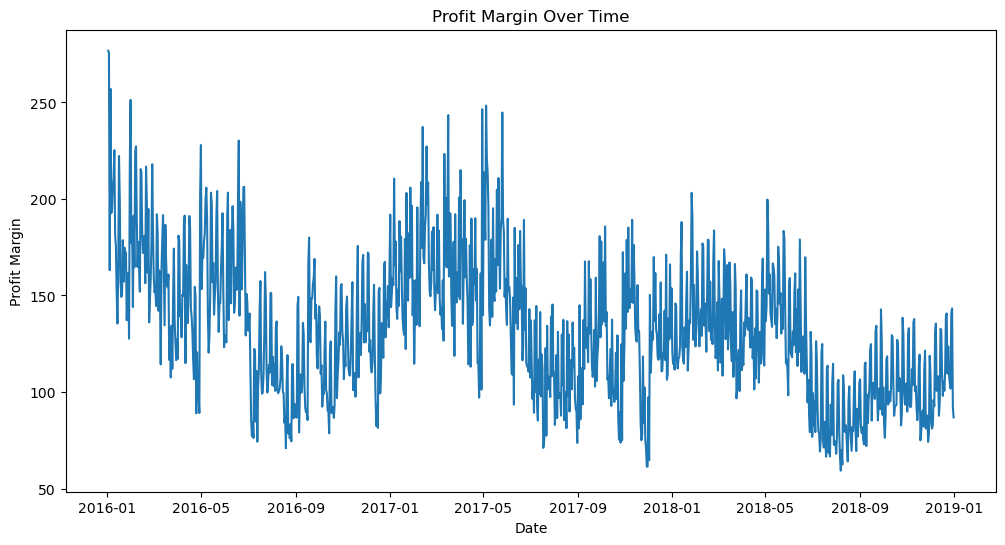

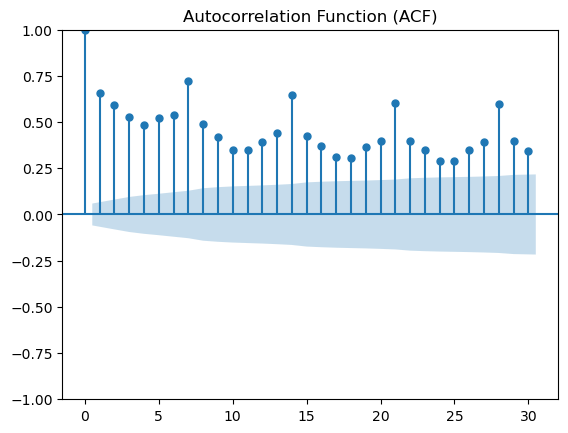

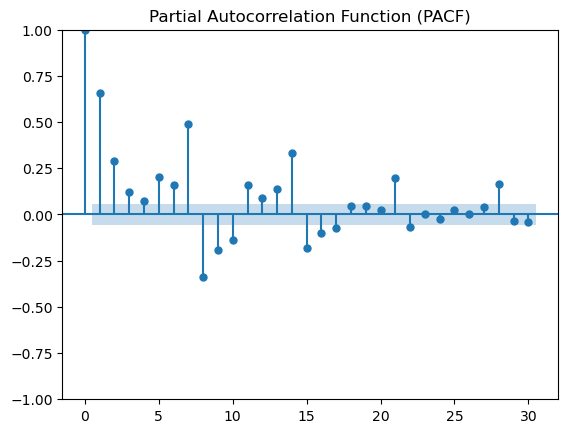

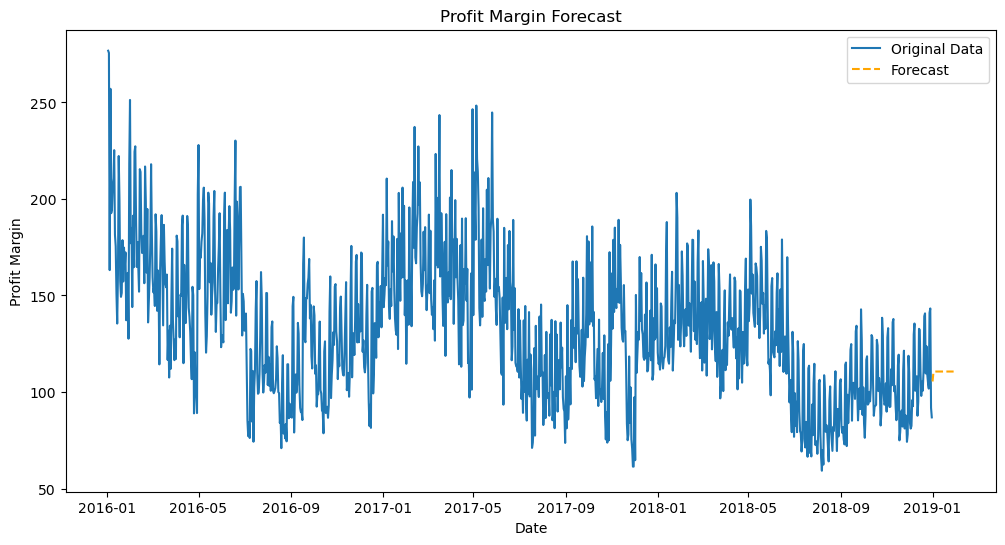

              Forecast
2018-12-31         NaN
2019-01-01  105.449506
2019-01-02  109.487314
2019-01-03  110.363553
2019-01-04  110.553704
2019-01-05  110.594968
2019-01-06  110.603923
2019-01-07  110.605866
2019-01-08  110.606288
2019-01-09  110.606379
2019-01-10  110.606399
2019-01-11  110.606404
2019-01-12  110.606405
2019-01-13  110.606405
2019-01-14  110.606405
2019-01-15  110.606405
2019-01-16  110.606405
2019-01-17  110.606405
2019-01-18  110.606405
2019-01-19  110.606405
2019-01-20  110.606405
2019-01-21  110.606405
2019-01-22  110.606405
2019-01-23  110.606405
2019-01-24  110.606405
2019-01-25  110.606405
2019-01-26  110.606405
2019-01-27  110.606405
2019-01-28  110.606405
2019-01-29  110.606405


In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Convert 'Date of Travel' to a datetime object
master_data['Date of Travel'] = pd.to_datetime(master_data['Date of Travel'])

# Set 'Date of Travel' as the index
master_data.set_index('Date of Travel', inplace=True)

# Select only the numeric columns for resampling
numeric_cols = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Price per KM', 'Profit', 'Income (USD/Month)']
master_data_numeric = master_data[numeric_cols]

# Resample data to a daily frequency (assuming your data is not already daily)
master_data_numeric = master_data_numeric.resample('D').mean()

# Extract the 'Profit_Margin' column as the target variable
profit_margin = master_data_numeric['Profit']

# Perform data exploration and visualization (optional)
# For example, you can plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(profit_margin)
plt.title('Profit Margin Over Time')
plt.xlabel('Date')
plt.ylabel('Profit Margin')
plt.show()

# Check for autocorrelation and partial autocorrelation
plot_acf(profit_margin, lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(profit_margin, lags=30)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Fit an ARIMA model
# You may need to adjust the order (p, d, q) based on ACF and PACF plots
p, d, q = 1, 1, 1
model = sm.tsa.ARIMA(profit_margin, order=(p, d, q))
model_fit = model.fit()

# Generate forecasts
forecast_steps = 30  # Adjust the number of forecasted days as needed
forecast = model_fit.forecast(steps=forecast_steps)

# Create a date range for the forecasted period
forecast_index = pd.date_range(start=profit_margin.index[-1], periods=forecast_steps)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_index)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(profit_margin, label='Original Data')
plt.plot(forecast_df, label='Forecast', linestyle='--', color='orange')
plt.title('Profit Margin Forecast')
plt.xlabel('Date')
plt.ylabel('Profit Margin')
plt.legend()
plt.show()

# Display the forecast DataFrame
print(forecast_df)



Profit Margin Trends: Your analysis indicates that the profit margin has been oscillating over time, with lower lows and lower highs. This suggests that there might be some seasonality or cyclicality in your data.

Autocorrelation Function (ACF): The ACF plot shows that there is a strong positive correlation between the profit margin at time t and the profit margin at time t-1. This indicates that there might be a lag-1 autocorrelation, which is a common feature in time series data.

Partial Autocorrelation Function (PACF): The PACF plot shows that there is a significant partial autocorrelation at lag-1 and then it decreases rapidly to become insignificant. This suggests that an autoregressive (AR) model with lag-1 might be suitable for modeling the data.

Forecast: The forecasted profit margin for the future period (2019-01-01 onwards) indicates an increase in profit margin. However, please note that the forecasted values have some uncertainty, and the model assumes that the historical patterns will continue.

Modeling Considerations: Given the patterns observed in your data and the ACF/PACF plots, you might consider using an ARIMA (AutoRegressive Integrated Moving Average) model with a lag-1 autoregressive component. You can further refine the model by adjusting the order of differencing (d) and the moving average component (q) if needed.

Investment Decision: To help stakeholders decide which company to invest in, you should consider not only the historical profit margin but also other relevant factors like the company's financial health, competitive position, industry trends, and economic conditions. The time series analysis provides insights into the profit margin's historical behavior, but it's just one piece of the investment puzzle.

Monitoring: After making an investment decision, it's crucial to monitor the actual profit margin against the forecasted values to assess the accuracy of the model and make adjustments as needed.

Further Analysis: You can explore more advanced time series forecasting techniques, such as SARIMA (Seasonal ARIMA), to capture any seasonality or long-term trends that may exist in your data.



In [316]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

# Load your data
# Assuming your data is loaded into a DataFrame called 'master_data'

# Convert the 'Date of Travel' column to datetime if it's not already
master_data['Date of Travel'] = pd.to_datetime(master_data['Date of Travel'])

# Set 'Date of Travel' as the index
master_data.set_index('Date of Travel', inplace=True)

# Select the 'Profit_Margin' column as the target variable
profit_margin = master_data['Profit_Margin']

# Plot the historical profit margin
plt.figure(figsize=(12, 6))
plt.plot(profit_margin)
plt.title('Historical Profit Margin Over Time')
plt.xlabel('Date')
plt.ylabel('Profit Margin')
plt.show()

# Fit an ARIMA model
# You may need to adjust the order (p, d, q) based on ACF and PACF plots
p, d, q = 1, 1, 1
model = ARIMA(profit_margin, order=(p, d, q))
model_fit = model.fit()

# Generate forecasts
forecast_steps = 30  # Adjust the number of forecasted days as needed
forecast = model_fit.forecast(steps=forecast_steps)

# Create a date range for the forecasted period
forecast_index = pd.date_range(start=profit_margin.index[-1], periods=forecast_steps, freq='D')

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_index)

# Plot the historical profit margin and the forecast
plt.figure(figsize=(12, 6))
plt.plot(profit_margin, label='Historical Data')
plt.plot(forecast_df, linestyle='--', label='Forecast', color='orange')
plt.title('Profit Margin Forecast')
plt.xlabel('Date')
plt.ylabel('Profit Margin')
plt.legend()
plt.show()

# Print the forecasted values
print(forecast_df)
